피처 설명

- age: 환자의 나이
- anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
- creatinine_phosphokinase: 크레아틴키나제 검사 결과
- diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
- ejection_fraction: 박출계수 (%)
- high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
- platelets: 혈소판 수 (kiloplatelets/mL)
- serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
- serum_sodium: 혈중 나트륨 레벨 (mEq/L)
- sex: 성별 (0: 여성, 1: 남성)
- smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
- time: 관찰 기간 (일)
- DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./data/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [2]:
data.info() # 널값이 없다 ㅎㅎ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [3]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


{'whiskers': [<matplotlib.lines.Line2D at 0x2137d82bec8>,
 'caps': [<matplotlib.lines.Line2D at 0x2137d84cc48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2137d83cbc8>],
 'medians': [<matplotlib.lines.Line2D at 0x2137d84cec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2137d854d08>],
 'means': []}

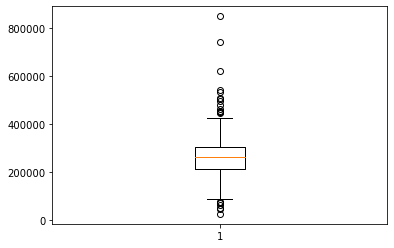

In [4]:
# platelets 75값이랑 최대값 차이가 너무 난다. ejection_fraction과 serum_creatinine 또한

plt.boxplot(data['platelets'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2137d8f4ec8>,
 'caps': [<matplotlib.lines.Line2D at 0x2137d8f8c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2137d8f46c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2137d8fdc48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2137d8fddc8>],
 'means': []}

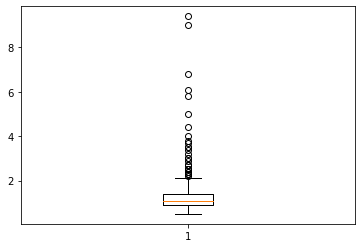

In [5]:
plt.boxplot(data['serum_creatinine'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2137d95d7c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2137d95df88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2137d956f88>],
 'medians': [<matplotlib.lines.Line2D at 0x2137d962d88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2137d967a48>],
 'means': []}

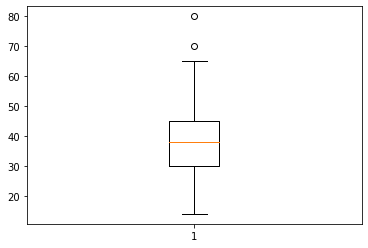

In [6]:
plt.boxplot(data['ejection_fraction'])

In [7]:
data.drop(['serum_creatinine', 'platelets'], axis=1, inplace=True)

In [8]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,130,1,0,4,1
1,55.0,0,7861,0,38,0,136,1,0,6,1
2,65.0,0,146,0,20,0,129,1,1,7,1
3,50.0,1,111,0,20,0,137,1,0,7,1
4,65.0,1,160,1,20,0,116,0,0,8,1


In [9]:
for column in ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT'] :
    print('\n column name : ', column)
    print(data[column].value_counts())
    # 모두 불균형


 column name :  anaemia
0    170
1    129
Name: anaemia, dtype: int64

 column name :  diabetes
0    174
1    125
Name: diabetes, dtype: int64

 column name :  high_blood_pressure
0    194
1    105
Name: high_blood_pressure, dtype: int64

 column name :  smoking
0    203
1     96
Name: smoking, dtype: int64

 column name :  DEATH_EVENT
0    203
1     96
Name: DEATH_EVENT, dtype: int64


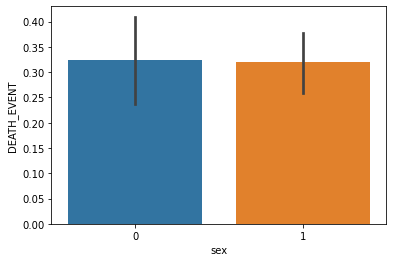

In [10]:
sns.barplot(x='sex', y='DEATH_EVENT', data=data)

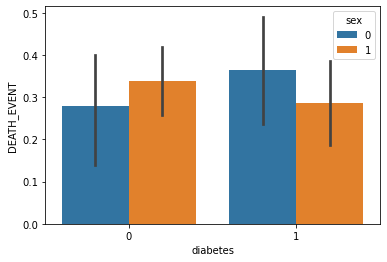

In [11]:
sns.barplot(x='diabetes', y='DEATH_EVENT', hue='sex', data=data)

In [12]:
from sklearn.preprocessing import StandardScaler

y = data['DEATH_EVENT']
X = data.drop('DEATH_EVENT', axis=1)
scaler = StandardScaler()
scaler.fit(X)
data_standardScaler = scaler.transform(X)
data_standardScaler_df = pd.DataFrame(data=data_standardScaler,
                              columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'serum_sodium', 'sex', 'smoking', 'time'])

print(data_standardScaler_df.mean())
print(data_standardScaler_df.var())

age                         5.265205e-16
anaemia                     3.594301e-16
creatinine_phosphokinase    3.713120e-18
diabetes                    1.113936e-16
ejection_fraction           3.341808e-18
high_blood_pressure        -4.841909e-16
serum_sodium               -8.627435e-16
sex                        -5.940993e-18
smoking                    -3.861645e-17
time                       -1.069379e-16
dtype: float64
age                         1.003356
anaemia                     1.003356
creatinine_phosphokinase    1.003356
diabetes                    1.003356
ejection_fraction           1.003356
high_blood_pressure         1.003356
serum_sodium                1.003356
sex                         1.003356
smoking                     1.003356
time                        1.003356
dtype: float64


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
data_MinMaxScaler = scaler.transform(X)
data_MinMaxScaler_df = pd.DataFrame(data=data_MinMaxScaler,
                              columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'serum_sodium', 'sex', 'smoking', 'time'])

print(data_MinMaxScaler_df.mean())
print(data_MinMaxScaler_df.var())

age                         0.378798
anaemia                     0.431438
creatinine_phosphokinase    0.071299
diabetes                    0.418060
ejection_fraction           0.364903
high_blood_pressure         0.351171
serum_sodium                0.675012
sex                         0.648829
smoking                     0.321070
time                        0.449327
dtype: float64
age                         0.046772
anaemia                     0.246122
creatinine_phosphokinase    0.015325
diabetes                    0.244102
ejection_fraction           0.032154
high_blood_pressure         0.228614
serum_sodium                0.015894
sex                         0.228614
smoking                     0.218716
time                        0.076290
dtype: float64


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# 데이터 전처리 + 스탠다드 스케일러
dt = DecisionTreeClassifier(random_state=11)
x = np.array(data_standardScaler_df.values.tolist())
X_train , X_test , y_train , y_test = train_test_split(x, y,
                                                       test_size=0.2,  random_state=11)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

pred = dt.predict(X_test)
pred_proba = dt.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, pred)
accuracy

0.7333333333333333

In [16]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [17]:
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[29 14]
 [ 2 15]]
정확도: 0.7333, 정밀도: 0.5172, 재현율: 0.8824,          F1: 0.6522, AUC:0.7784


In [18]:
# 데이터 전처리 + 민맥스스케일러

dt = DecisionTreeClassifier(random_state=11)
x = np.array(data_MinMaxScaler_df.values.tolist())
X_train , X_test , y_train , y_test = train_test_split(x, y,
                                                       test_size=0.2,  random_state=11)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

pred = dt.predict(X_test)
pred_proba = dt.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, pred)
accuracy

0.7333333333333333

In [20]:
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[29 14]
 [ 2 15]]
정확도: 0.7333, 정밀도: 0.5172, 재현율: 0.8824,          F1: 0.6522, AUC:0.7784


In [21]:
data = pd.read_csv('./data/heart_failure_clinical_records_dataset.csv')
data = data.drop('DEATH_EVENT', axis=1)

In [22]:
# 데이터전처리 x

dt = DecisionTreeClassifier(random_state=11)
x = np.array(data.values.tolist())
X_train , X_test , y_train , y_test = train_test_split(x, y,
                                                       test_size=0.2,  random_state=11)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

pred = dt.predict(X_test)
pred_proba = dt.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, pred)
accuracy

0.8

In [24]:
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[33 10]
 [ 2 15]]
정확도: 0.8000, 정밀도: 0.6000, 재현율: 0.8824,          F1: 0.7143, AUC:0.8249


In [25]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

In [26]:
# 기본 데이터 + 민맥스스케일러
scaler = MinMaxScaler()
scaler.fit(data)
data_MinMaxScaler = scaler.transform(data)
data_MinMaxScaler_df = pd.DataFrame(data=data_MinMaxScaler,
                              columns=data.columns)

In [27]:
dt = DecisionTreeClassifier(random_state=11)
x = np.array(data_MinMaxScaler_df.values.tolist())
X_train , X_test , y_train , y_test = train_test_split(x, y,
                                                       test_size=0.2,  random_state=11)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

pred = dt.predict(X_test)
pred_proba = dt.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, pred)
train = dt.predict(X_train)
train_accuracy = accuracy_score(y_train, train)
accuracy, train_accuracy

(0.8, 1.0)

In [29]:
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[33 10]
 [ 2 15]]
정확도: 0.8000, 정밀도: 0.6000, 재현율: 0.8824,          F1: 0.7143, AUC:0.8249


In [30]:
scaler = StandardScaler()
scaler.fit(data)
data_StandardScaler = scaler.transform(data)
data_StandardScaler_df = pd.DataFrame(data=data_StandardScaler,
                              columns=data.columns)

In [31]:
dt = DecisionTreeClassifier(random_state=11)
x = np.array(data_StandardScaler_df.values.tolist())
X_train , X_test , y_train , y_test = train_test_split(x, y,
                                                       test_size=0.2,  random_state=11)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

pred = dt.predict(X_test)
pred_proba = dt.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, pred)
accuracy

0.8166666666666667

In [33]:
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[34  9]
 [ 2 15]]
정확도: 0.8167, 정밀도: 0.6250, 재현율: 0.8824,          F1: 0.7317, AUC:0.8365


In [34]:
train = dt.predict(X_train)
accuracy = accuracy_score(y_train, train)

In [35]:
accuracy

1.0

In [36]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.7871
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.0s finished


In [39]:
dt = DecisionTreeClassifier(max_depth=8, random_state=11)
x = np.array(data_StandardScaler_df.values.tolist())
X_train , X_test , y_train , y_test = train_test_split(x, y,
                                                       test_size=0.2,  random_state=11)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=11)

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

pred = dt.predict(X_test)
pred_proba = dt.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, pred)
accuracy

0.8166666666666667

In [41]:
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[34  9]
 [ 2 15]]
정확도: 0.8167, 정밀도: 0.6250, 재현율: 0.8824,          F1: 0.7317, AUC:0.8365


In [43]:
train = dt.predict(X_train)
accuracy = accuracy_score(y_train, train)
accuracy

1.0

In [52]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=100)

evals = [(X_test, y_test)]
lgbm.fit(X_train, y_train, early_stopping_rounds=50, eval_metric='logloss',
         eval_set=evals, verbose=True)
preds = lgbm.predict(X_test)
train_pred = lgbm.predict(X_train)
accuracy = accuracy_score(y_test, preds)
train_accurcy = accuracy_score(y_train, train_pred)
accuracy, train_accuracy

[1]	valid_0's binary_logloss: 0.555804
Training until validation scores don't improve for 50 rounds
[2]	valid_0's binary_logloss: 0.520225
[3]	valid_0's binary_logloss: 0.495545
[4]	valid_0's binary_logloss: 0.472339
[5]	valid_0's binary_logloss: 0.445424
[6]	valid_0's binary_logloss: 0.431865
[7]	valid_0's binary_logloss: 0.40992
[8]	valid_0's binary_logloss: 0.401067
[9]	valid_0's binary_logloss: 0.388389
[10]	valid_0's binary_logloss: 0.373889
[11]	valid_0's binary_logloss: 0.367715
[12]	valid_0's binary_logloss: 0.358819
[13]	valid_0's binary_logloss: 0.348854
[14]	valid_0's binary_logloss: 0.347711
[15]	valid_0's binary_logloss: 0.34375
[16]	valid_0's binary_logloss: 0.341196
[17]	valid_0's binary_logloss: 0.33175
[18]	valid_0's binary_logloss: 0.331381
[19]	valid_0's binary_logloss: 0.325392
[20]	valid_0's binary_logloss: 0.320896
[21]	valid_0's binary_logloss: 0.315555
[22]	valid_0's binary_logloss: 0.315945
[23]	valid_0's binary_logloss: 0.309665
[24]	valid_0's binary_logloss: 

(0.8666666666666667, 1.0)

In [54]:
pred_proba = lgbm.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[38  5]
 [ 3 14]]
정확도: 0.8667, 정밀도: 0.7368, 재현율: 0.8235,          F1: 0.7778, AUC:0.9466


In [55]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
lgbm_clf = LGBMClassifier(n_estimators=100)

params = {'num_leaves': [32, 64 ],
          'max_depth':[64, 80],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# cv는 3으로 지정 
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.738805	valid_0's binary_logloss: 0.615737	valid_1's auc: 0.766074	valid_1's binary_logloss: 0.581279
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.738805	valid_0's binary_logloss: 0.600563	valid_1's auc: 0.766074	valid_1's binary_logloss: 0.565625
[3]	valid_0's auc: 0.741258	valid_0's binary_logloss: 0.588936	valid_1's auc: 0.777702	valid_1's binary_logloss: 0.553836
[4]	valid_0's auc: 0.741258	valid_0's binary_logloss: 0.578717	valid_1's auc: 0.777702	valid_1's binary_logloss: 0.542995
[5]	valid_0's auc: 0.741258	valid_0's binary_logloss: 0.570855	valid_1's auc: 0.777702	valid_1's binary_logloss: 0.534822
[6]	valid_0's auc: 0.797271	valid_0's binary_logloss: 0.563764	valid_1's auc: 0.871409	valid_1's binary_logloss: 0.522245
[7]	valid_0's auc: 0.797271	valid_0's binary_logloss: 0.556898	valid_1's auc: 0.871409	valid_1's binary_logloss: 0.514683
[8]	valid_0's auc: 0.797271	valid_0's binary_logloss: 0.551263	valid_1's auc: 0.87140

[67]	valid_0's auc: 0.871203	valid_0's binary_logloss: 0.412239	valid_1's auc: 0.937073	valid_1's binary_logloss: 0.316069
[68]	valid_0's auc: 0.871677	valid_0's binary_logloss: 0.411851	valid_1's auc: 0.937073	valid_1's binary_logloss: 0.316458
[69]	valid_0's auc: 0.871994	valid_0's binary_logloss: 0.411463	valid_1's auc: 0.937073	valid_1's binary_logloss: 0.316512
[70]	valid_0's auc: 0.872785	valid_0's binary_logloss: 0.411231	valid_1's auc: 0.934337	valid_1's binary_logloss: 0.315347
[71]	valid_0's auc: 0.872389	valid_0's binary_logloss: 0.410713	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.314063
[72]	valid_0's auc: 0.87318	valid_0's binary_logloss: 0.410401	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.315107
[73]	valid_0's auc: 0.873418	valid_0's binary_logloss: 0.410073	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.315477
[74]	valid_0's auc: 0.873339	valid_0's binary_logloss: 0.41007	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.315261
[75]	valid_0's auc

[93]	valid_0's auc: 0.871796	valid_0's binary_logloss: 0.421638	valid_1's auc: 0.947332	valid_1's binary_logloss: 0.327752
[94]	valid_0's auc: 0.871638	valid_0's binary_logloss: 0.421468	valid_1's auc: 0.945964	valid_1's binary_logloss: 0.32687
Early stopping, best iteration is:
[64]	valid_0's auc: 0.865862	valid_0's binary_logloss: 0.431076	valid_1's auc: 0.954172	valid_1's binary_logloss: 0.329246
[1]	valid_0's auc: 0.738805	valid_0's binary_logloss: 0.615737	valid_1's auc: 0.766074	valid_1's binary_logloss: 0.581279
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.738805	valid_0's binary_logloss: 0.600563	valid_1's auc: 0.766074	valid_1's binary_logloss: 0.565625
[3]	valid_0's auc: 0.741258	valid_0's binary_logloss: 0.588936	valid_1's auc: 0.777702	valid_1's binary_logloss: 0.553836
[4]	valid_0's auc: 0.741258	valid_0's binary_logloss: 0.578717	valid_1's auc: 0.777702	valid_1's binary_logloss: 0.542995
[5]	valid_0's auc: 0.741258	valid_0's binary_log

[35]	valid_0's auc: 0.860206	valid_0's binary_logloss: 0.432426	valid_1's auc: 0.928865	valid_1's binary_logloss: 0.344549
[36]	valid_0's auc: 0.861472	valid_0's binary_logloss: 0.431012	valid_1's auc: 0.928865	valid_1's binary_logloss: 0.3415
[37]	valid_0's auc: 0.861392	valid_0's binary_logloss: 0.430557	valid_1's auc: 0.928865	valid_1's binary_logloss: 0.340552
[38]	valid_0's auc: 0.861551	valid_0's binary_logloss: 0.429154	valid_1's auc: 0.927497	valid_1's binary_logloss: 0.33781
[39]	valid_0's auc: 0.862579	valid_0's binary_logloss: 0.428116	valid_1's auc: 0.931601	valid_1's binary_logloss: 0.337606
[40]	valid_0's auc: 0.862658	valid_0's binary_logloss: 0.427769	valid_1's auc: 0.931601	valid_1's binary_logloss: 0.336799
[41]	valid_0's auc: 0.862658	valid_0's binary_logloss: 0.426566	valid_1's auc: 0.930233	valid_1's binary_logloss: 0.33435
[42]	valid_0's auc: 0.862579	valid_0's binary_logloss: 0.425698	valid_1's auc: 0.931601	valid_1's binary_logloss: 0.334222
[43]	valid_0's auc: 

[91]	valid_0's auc: 0.871321	valid_0's binary_logloss: 0.422057	valid_1's auc: 0.950068	valid_1's binary_logloss: 0.327409
[92]	valid_0's auc: 0.872033	valid_0's binary_logloss: 0.421909	valid_1's auc: 0.950068	valid_1's binary_logloss: 0.327711
[93]	valid_0's auc: 0.871796	valid_0's binary_logloss: 0.421638	valid_1's auc: 0.947332	valid_1's binary_logloss: 0.327752
[94]	valid_0's auc: 0.871638	valid_0's binary_logloss: 0.421468	valid_1's auc: 0.945964	valid_1's binary_logloss: 0.32687
Early stopping, best iteration is:
[64]	valid_0's auc: 0.865862	valid_0's binary_logloss: 0.431076	valid_1's auc: 0.954172	valid_1's binary_logloss: 0.329246
[1]	valid_0's auc: 0.738805	valid_0's binary_logloss: 0.615737	valid_1's auc: 0.766074	valid_1's binary_logloss: 0.581279
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.738805	valid_0's binary_logloss: 0.600563	valid_1's auc: 0.766074	valid_1's binary_logloss: 0.565625
[3]	valid_0's auc: 0.741258	valid_0's binary_l

[57]	valid_0's auc: 0.86697	valid_0's binary_logloss: 0.416854	valid_1's auc: 0.937073	valid_1's binary_logloss: 0.320574
[58]	valid_0's auc: 0.868038	valid_0's binary_logloss: 0.416357	valid_1's auc: 0.937073	valid_1's binary_logloss: 0.319211
[59]	valid_0's auc: 0.867484	valid_0's binary_logloss: 0.415829	valid_1's auc: 0.937073	valid_1's binary_logloss: 0.319207
[60]	valid_0's auc: 0.86875	valid_0's binary_logloss: 0.41549	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.317755
[61]	valid_0's auc: 0.868354	valid_0's binary_logloss: 0.415059	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.31896
[62]	valid_0's auc: 0.869146	valid_0's binary_logloss: 0.41439	valid_1's auc: 0.93844	valid_1's binary_logloss: 0.317397
[63]	valid_0's auc: 0.869541	valid_0's binary_logloss: 0.413936	valid_1's auc: 0.93844	valid_1's binary_logloss: 0.317429
[64]	valid_0's auc: 0.870095	valid_0's binary_logloss: 0.413489	valid_1's auc: 0.937073	valid_1's binary_logloss: 0.317824
[65]	valid_0's auc: 0.8

[1]	valid_0's auc: 0.738805	valid_0's binary_logloss: 0.615737	valid_1's auc: 0.766074	valid_1's binary_logloss: 0.581279
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.738805	valid_0's binary_logloss: 0.600563	valid_1's auc: 0.766074	valid_1's binary_logloss: 0.565625
[3]	valid_0's auc: 0.741258	valid_0's binary_logloss: 0.588936	valid_1's auc: 0.777702	valid_1's binary_logloss: 0.553836
[4]	valid_0's auc: 0.741258	valid_0's binary_logloss: 0.578717	valid_1's auc: 0.777702	valid_1's binary_logloss: 0.542995
[5]	valid_0's auc: 0.741258	valid_0's binary_logloss: 0.570855	valid_1's auc: 0.777702	valid_1's binary_logloss: 0.534822
[6]	valid_0's auc: 0.797271	valid_0's binary_logloss: 0.563764	valid_1's auc: 0.871409	valid_1's binary_logloss: 0.522245
[7]	valid_0's auc: 0.797271	valid_0's binary_logloss: 0.556898	valid_1's auc: 0.871409	valid_1's binary_logloss: 0.514683
[8]	valid_0's auc: 0.797271	valid_0's binary_logloss: 0.551263	valid_1's auc: 0.87140

[78]	valid_0's auc: 0.873892	valid_0's binary_logloss: 0.40911	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.313086
[79]	valid_0's auc: 0.873972	valid_0's binary_logloss: 0.408926	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.312041
[80]	valid_0's auc: 0.873813	valid_0's binary_logloss: 0.40862	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.312407
[81]	valid_0's auc: 0.874763	valid_0's binary_logloss: 0.408319	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.312481
[82]	valid_0's auc: 0.875	valid_0's binary_logloss: 0.408048	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.313454
[83]	valid_0's auc: 0.874921	valid_0's binary_logloss: 0.408031	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.313085
[84]	valid_0's auc: 0.874604	valid_0's binary_logloss: 0.407574	valid_1's auc: 0.937073	valid_1's binary_logloss: 0.311896
[85]	valid_0's auc: 0.874604	valid_0's binary_logloss: 0.407577	valid_1's auc: 0.937073	valid_1's binary_logloss: 0.311574
[86]	valid_0's auc: 0

[1]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.689055	valid_1's auc: 0.5	valid_1's binary_logloss: 0.620922
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.689055	valid_1's auc: 0.5	valid_1's binary_logloss: 0.620922
[3]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.689055	valid_1's auc: 0.5	valid_1's binary_logloss: 0.620922
[4]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.689055	valid_1's auc: 0.5	valid_1's binary_logloss: 0.620922
[5]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.689055	valid_1's auc: 0.5	valid_1's binary_logloss: 0.620922
[6]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.689055	valid_1's auc: 0.5	valid_1's binary_logloss: 0.620922
[7]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.689055	valid_1's auc: 0.5	valid_1's binary_logloss: 0.620922
[8]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.689055	valid_1's auc: 0.5	valid_1's binary_logloss: 0.620922
[9]	valid_0's auc: 0.5	valid_0's binary_log

[1]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
[3]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
[4]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
[5]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
[6]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
[7]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
[8]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
[9]	valid_0's auc: 0.5	valid_0's binary_log

[14]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
[15]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
[16]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
[17]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
[18]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
[19]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
[20]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
[21]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
[22]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_l

[27]	valid_0's auc: 0.854826	valid_0's binary_logloss: 0.464855	valid_1's auc: 0.909713	valid_1's binary_logloss: 0.40072
[28]	valid_0's auc: 0.857832	valid_0's binary_logloss: 0.463187	valid_1's auc: 0.912449	valid_1's binary_logloss: 0.401282
[29]	valid_0's auc: 0.858149	valid_0's binary_logloss: 0.461071	valid_1's auc: 0.913817	valid_1's binary_logloss: 0.396061
[30]	valid_0's auc: 0.859335	valid_0's binary_logloss: 0.458907	valid_1's auc: 0.917921	valid_1's binary_logloss: 0.395739
[31]	valid_0's auc: 0.859968	valid_0's binary_logloss: 0.456028	valid_1's auc: 0.917921	valid_1's binary_logloss: 0.39248
[32]	valid_0's auc: 0.86159	valid_0's binary_logloss: 0.454726	valid_1's auc: 0.917921	valid_1's binary_logloss: 0.393075
[33]	valid_0's auc: 0.860641	valid_0's binary_logloss: 0.453102	valid_1's auc: 0.915185	valid_1's binary_logloss: 0.388194
[34]	valid_0's auc: 0.861274	valid_0's binary_logloss: 0.451367	valid_1's auc: 0.919289	valid_1's binary_logloss: 0.388104
[35]	valid_0's auc:

[1]	valid_0's auc: 0.70265	valid_0's binary_logloss: 0.618129	valid_1's auc: 0.691518	valid_1's binary_logloss: 0.587697
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.771796	valid_0's binary_logloss: 0.601582	valid_1's auc: 0.762654	valid_1's binary_logloss: 0.573264
[3]	valid_0's auc: 0.779945	valid_0's binary_logloss: 0.587087	valid_1's auc: 0.78933	valid_1's binary_logloss: 0.558178
[4]	valid_0's auc: 0.779945	valid_0's binary_logloss: 0.576489	valid_1's auc: 0.78933	valid_1's binary_logloss: 0.549524
[5]	valid_0's auc: 0.783663	valid_0's binary_logloss: 0.565716	valid_1's auc: 0.798222	valid_1's binary_logloss: 0.537225
[6]	valid_0's auc: 0.790862	valid_0's binary_logloss: 0.555093	valid_1's auc: 0.798222	valid_1's binary_logloss: 0.525863
[7]	valid_0's auc: 0.826266	valid_0's binary_logloss: 0.546909	valid_1's auc: 0.866621	valid_1's binary_logloss: 0.511043
[8]	valid_0's auc: 0.826266	valid_0's binary_logloss: 0.538527	valid_1's auc: 0.866621	v

[31]	valid_0's auc: 0.859968	valid_0's binary_logloss: 0.456028	valid_1's auc: 0.917921	valid_1's binary_logloss: 0.39248
[32]	valid_0's auc: 0.86159	valid_0's binary_logloss: 0.454726	valid_1's auc: 0.917921	valid_1's binary_logloss: 0.393075
[33]	valid_0's auc: 0.860641	valid_0's binary_logloss: 0.453102	valid_1's auc: 0.915185	valid_1's binary_logloss: 0.388194
[34]	valid_0's auc: 0.861274	valid_0's binary_logloss: 0.451367	valid_1's auc: 0.919289	valid_1's binary_logloss: 0.388104
[35]	valid_0's auc: 0.861709	valid_0's binary_logloss: 0.449578	valid_1's auc: 0.919973	valid_1's binary_logloss: 0.386361
[36]	valid_0's auc: 0.862816	valid_0's binary_logloss: 0.4479	valid_1's auc: 0.925445	valid_1's binary_logloss: 0.382624
[37]	valid_0's auc: 0.86337	valid_0's binary_logloss: 0.445502	valid_1's auc: 0.925445	valid_1's binary_logloss: 0.379704
[38]	valid_0's auc: 0.864478	valid_0's binary_logloss: 0.444486	valid_1's auc: 0.921341	valid_1's binary_logloss: 0.380319
[39]	valid_0's auc: 0

[1]	valid_0's auc: 0.70265	valid_0's binary_logloss: 0.618129	valid_1's auc: 0.691518	valid_1's binary_logloss: 0.587697
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.771796	valid_0's binary_logloss: 0.601582	valid_1's auc: 0.762654	valid_1's binary_logloss: 0.573264
[3]	valid_0's auc: 0.779945	valid_0's binary_logloss: 0.587087	valid_1's auc: 0.78933	valid_1's binary_logloss: 0.558178
[4]	valid_0's auc: 0.779945	valid_0's binary_logloss: 0.576489	valid_1's auc: 0.78933	valid_1's binary_logloss: 0.549524
[5]	valid_0's auc: 0.783663	valid_0's binary_logloss: 0.565716	valid_1's auc: 0.798222	valid_1's binary_logloss: 0.537225
[6]	valid_0's auc: 0.790862	valid_0's binary_logloss: 0.555093	valid_1's auc: 0.798222	valid_1's binary_logloss: 0.525863
[7]	valid_0's auc: 0.826266	valid_0's binary_logloss: 0.546909	valid_1's auc: 0.866621	valid_1's binary_logloss: 0.511043
[8]	valid_0's auc: 0.826266	valid_0's binary_logloss: 0.538527	valid_1's auc: 0.866621	v

[52]	valid_0's auc: 0.873892	valid_0's binary_logloss: 0.429199	valid_1's auc: 0.911765	valid_1's binary_logloss: 0.36955
[53]	valid_0's auc: 0.873892	valid_0's binary_logloss: 0.428266	valid_1's auc: 0.914501	valid_1's binary_logloss: 0.369867
[54]	valid_0's auc: 0.875079	valid_0's binary_logloss: 0.427492	valid_1's auc: 0.910397	valid_1's binary_logloss: 0.370687
[55]	valid_0's auc: 0.875237	valid_0's binary_logloss: 0.426594	valid_1's auc: 0.914501	valid_1's binary_logloss: 0.368096
[56]	valid_0's auc: 0.87682	valid_0's binary_logloss: 0.426018	valid_1's auc: 0.914501	valid_1's binary_logloss: 0.368941
[57]	valid_0's auc: 0.87682	valid_0's binary_logloss: 0.425136	valid_1's auc: 0.917237	valid_1's binary_logloss: 0.368198
[58]	valid_0's auc: 0.877611	valid_0's binary_logloss: 0.424598	valid_1's auc: 0.914501	valid_1's binary_logloss: 0.365223
[59]	valid_0's auc: 0.878758	valid_0's binary_logloss: 0.423803	valid_1's auc: 0.917237	valid_1's binary_logloss: 0.365293
[60]	valid_0's auc:

[84]	valid_0's auc: 0.874604	valid_0's binary_logloss: 0.407574	valid_1's auc: 0.937073	valid_1's binary_logloss: 0.311896
[85]	valid_0's auc: 0.874604	valid_0's binary_logloss: 0.407577	valid_1's auc: 0.937073	valid_1's binary_logloss: 0.311574
[86]	valid_0's auc: 0.874684	valid_0's binary_logloss: 0.407314	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.311917
[87]	valid_0's auc: 0.874842	valid_0's binary_logloss: 0.40716	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.310958
[88]	valid_0's auc: 0.875158	valid_0's binary_logloss: 0.406886	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.311041
[89]	valid_0's auc: 0.875475	valid_0's binary_logloss: 0.40665	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.311952
[90]	valid_0's auc: 0.875712	valid_0's binary_logloss: 0.406263	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.310838
[91]	valid_0's auc: 0.875633	valid_0's binary_logloss: 0.406279	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.310541
[92]	valid_0's auc

[63]	valid_0's auc: 0.865862	valid_0's binary_logloss: 0.431858	valid_1's auc: 0.950068	valid_1's binary_logloss: 0.329319
[64]	valid_0's auc: 0.865862	valid_0's binary_logloss: 0.431076	valid_1's auc: 0.954172	valid_1's binary_logloss: 0.329246
[65]	valid_0's auc: 0.866495	valid_0's binary_logloss: 0.430502	valid_1's auc: 0.952804	valid_1's binary_logloss: 0.329664
[66]	valid_0's auc: 0.866337	valid_0's binary_logloss: 0.430574	valid_1's auc: 0.951436	valid_1's binary_logloss: 0.328236
[67]	valid_0's auc: 0.865783	valid_0's binary_logloss: 0.430245	valid_1's auc: 0.951436	valid_1's binary_logloss: 0.327099
[68]	valid_0's auc: 0.866337	valid_0's binary_logloss: 0.429925	valid_1's auc: 0.952804	valid_1's binary_logloss: 0.32728
[69]	valid_0's auc: 0.86784	valid_0's binary_logloss: 0.429435	valid_1's auc: 0.950068	valid_1's binary_logloss: 0.32714
[70]	valid_0's auc: 0.868078	valid_0's binary_logloss: 0.428937	valid_1's auc: 0.951436	valid_1's binary_logloss: 0.327586
[71]	valid_0's auc:

[53]	valid_0's auc: 0.873892	valid_0's binary_logloss: 0.428266	valid_1's auc: 0.914501	valid_1's binary_logloss: 0.369867
[54]	valid_0's auc: 0.875079	valid_0's binary_logloss: 0.427492	valid_1's auc: 0.910397	valid_1's binary_logloss: 0.370687
[55]	valid_0's auc: 0.875237	valid_0's binary_logloss: 0.426594	valid_1's auc: 0.914501	valid_1's binary_logloss: 0.368096
[56]	valid_0's auc: 0.87682	valid_0's binary_logloss: 0.426018	valid_1's auc: 0.914501	valid_1's binary_logloss: 0.368941
[57]	valid_0's auc: 0.87682	valid_0's binary_logloss: 0.425136	valid_1's auc: 0.917237	valid_1's binary_logloss: 0.368198
[58]	valid_0's auc: 0.877611	valid_0's binary_logloss: 0.424598	valid_1's auc: 0.914501	valid_1's binary_logloss: 0.365223
[59]	valid_0's auc: 0.878758	valid_0's binary_logloss: 0.423803	valid_1's auc: 0.917237	valid_1's binary_logloss: 0.365293
[60]	valid_0's auc: 0.877967	valid_0's binary_logloss: 0.422374	valid_1's auc: 0.915869	valid_1's binary_logloss: 0.362913
[61]	valid_0's auc

[70]	valid_0's auc: 0.872785	valid_0's binary_logloss: 0.411231	valid_1's auc: 0.934337	valid_1's binary_logloss: 0.315347
[71]	valid_0's auc: 0.872389	valid_0's binary_logloss: 0.410713	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.314063
[72]	valid_0's auc: 0.87318	valid_0's binary_logloss: 0.410401	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.315107
[73]	valid_0's auc: 0.873418	valid_0's binary_logloss: 0.410073	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.315477
[74]	valid_0's auc: 0.873339	valid_0's binary_logloss: 0.41007	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.315261
[75]	valid_0's auc: 0.873339	valid_0's binary_logloss: 0.410002	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.314787
[76]	valid_0's auc: 0.873418	valid_0's binary_logloss: 0.409966	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.314384
[77]	valid_0's auc: 0.873813	valid_0's binary_logloss: 0.409609	valid_1's auc: 0.935705	valid_1's binary_logloss: 0.31445
[78]	valid_0's auc:

[69]	valid_0's auc: 0.86784	valid_0's binary_logloss: 0.429435	valid_1's auc: 0.950068	valid_1's binary_logloss: 0.32714
[70]	valid_0's auc: 0.868078	valid_0's binary_logloss: 0.428937	valid_1's auc: 0.951436	valid_1's binary_logloss: 0.327586
[71]	valid_0's auc: 0.868552	valid_0's binary_logloss: 0.428658	valid_1's auc: 0.951436	valid_1's binary_logloss: 0.328244
[72]	valid_0's auc: 0.86871	valid_0's binary_logloss: 0.428082	valid_1's auc: 0.950068	valid_1's binary_logloss: 0.329569
[73]	valid_0's auc: 0.869818	valid_0's binary_logloss: 0.427416	valid_1's auc: 0.950068	valid_1's binary_logloss: 0.329548
[74]	valid_0's auc: 0.86966	valid_0's binary_logloss: 0.427139	valid_1's auc: 0.950068	valid_1's binary_logloss: 0.328475
[75]	valid_0's auc: 0.86871	valid_0's binary_logloss: 0.427248	valid_1's auc: 0.950068	valid_1's binary_logloss: 0.327176
[76]	valid_0's auc: 0.869976	valid_0's binary_logloss: 0.426849	valid_1's auc: 0.9487	valid_1's binary_logloss: 0.327109
[77]	valid_0's auc: 0.8

[6]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.683854	valid_1's auc: 0.5	valid_1's binary_logloss: 0.61752
[7]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.683854	valid_1's auc: 0.5	valid_1's binary_logloss: 0.61752
[8]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.683854	valid_1's auc: 0.5	valid_1's binary_logloss: 0.61752
[9]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.683854	valid_1's auc: 0.5	valid_1's binary_logloss: 0.61752
[10]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.683854	valid_1's auc: 0.5	valid_1's binary_logloss: 0.61752
[11]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.683854	valid_1's auc: 0.5	valid_1's binary_logloss: 0.61752
[12]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.683854	valid_1's auc: 0.5	valid_1's binary_logloss: 0.61752
[13]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.683854	valid_1's auc: 0.5	valid_1's binary_logloss: 0.61752
[14]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.683854	valid_1's auc: 0.5	valid_1's binary_logloss: 0.61

[1]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.689055	valid_1's auc: 0.5	valid_1's binary_logloss: 0.620922
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.689055	valid_1's auc: 0.5	valid_1's binary_logloss: 0.620922
[3]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.689055	valid_1's auc: 0.5	valid_1's binary_logloss: 0.620922
[4]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.689055	valid_1's auc: 0.5	valid_1's binary_logloss: 0.620922
[5]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.689055	valid_1's auc: 0.5	valid_1's binary_logloss: 0.620922
[6]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.689055	valid_1's auc: 0.5	valid_1's binary_logloss: 0.620922
[7]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.689055	valid_1's auc: 0.5	valid_1's binary_logloss: 0.620922
[8]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.689055	valid_1's auc: 0.5	valid_1's binary_logloss: 0.620922
[9]	valid_0's auc: 0.5	valid_0's binary_log

[1]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
[3]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
[4]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
[5]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
[6]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
[7]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
[8]	valid_0's auc: 0.5	valid_0's binary_logloss: 0.681375	valid_1's auc: 0.5	valid_1's binary_logloss: 0.615927
[9]	valid_0's auc: 0.5	valid_0's binary_log

[51]	training's auc: 0.948259	training's binary_logloss: 0.299235	valid_1's auc: 0.964432	valid_1's binary_logloss: 0.274946
[52]	training's auc: 0.948734	training's binary_logloss: 0.29825	valid_1's auc: 0.967168	valid_1's binary_logloss: 0.272747
[53]	training's auc: 0.949525	training's binary_logloss: 0.296183	valid_1's auc: 0.964432	valid_1's binary_logloss: 0.275651
[54]	training's auc: 0.950277	training's binary_logloss: 0.295341	valid_1's auc: 0.964432	valid_1's binary_logloss: 0.2756
[55]	training's auc: 0.95178	training's binary_logloss: 0.293421	valid_1's auc: 0.967168	valid_1's binary_logloss: 0.275592
[56]	training's auc: 0.951701	training's binary_logloss: 0.292643	valid_1's auc: 0.967168	valid_1's binary_logloss: 0.274038
[57]	training's auc: 0.95178	training's binary_logloss: 0.291809	valid_1's auc: 0.968536	valid_1's binary_logloss: 0.27194
[58]	training's auc: 0.952176	training's binary_logloss: 0.290076	valid_1's auc: 0.967168	valid_1's binary_logloss: 0.271126
[59]	t

In [56]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=100, max_depth=64, min_child_samples=60, num_leaves=32, subsample=0.8)

evals = [(X_test, y_test)]
lgbm.fit(X_train, y_train, early_stopping_rounds=50, eval_metric='logloss',
         eval_set=evals, verbose=True)
preds = lgbm.predict(X_test)
train_pred = lgbm.predict(X_train)
accuracy = accuracy_score(y_test, preds)
train_accurcy = accuracy_score(y_train, train_pred)
accuracy, train_accuracy

[1]	valid_0's binary_logloss: 0.556769
Training until validation scores don't improve for 50 rounds
[2]	valid_0's binary_logloss: 0.520994
[3]	valid_0's binary_logloss: 0.491604
[4]	valid_0's binary_logloss: 0.464697
[5]	valid_0's binary_logloss: 0.442153
[6]	valid_0's binary_logloss: 0.422484
[7]	valid_0's binary_logloss: 0.404968
[8]	valid_0's binary_logloss: 0.399595
[9]	valid_0's binary_logloss: 0.388864
[10]	valid_0's binary_logloss: 0.385437
[11]	valid_0's binary_logloss: 0.376746
[12]	valid_0's binary_logloss: 0.373998
[13]	valid_0's binary_logloss: 0.363735
[14]	valid_0's binary_logloss: 0.361932
[15]	valid_0's binary_logloss: 0.352315
[16]	valid_0's binary_logloss: 0.347472
[17]	valid_0's binary_logloss: 0.341039
[18]	valid_0's binary_logloss: 0.335508
[19]	valid_0's binary_logloss: 0.332299
[20]	valid_0's binary_logloss: 0.328764
[21]	valid_0's binary_logloss: 0.326004
[22]	valid_0's binary_logloss: 0.322357
[23]	valid_0's binary_logloss: 0.319757
[24]	valid_0's binary_loglos

(0.9, 1.0)